In [1]:
import pandas as pd
import seaborn as sn
import numpy as np
from imblearn.over_sampling import SMOTE

import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.regularizers import l2

from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import Imputer
from sklearn.utils import shuffle
from sklearn import tree
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
df = pd.read_csv('./data/sesion_joind_gender_age.csv')

Use back fill 来保证最少程度减少bias.

In [3]:

df = df.fillna(method="backfill")
df = df.fillna(method="ffill")

Seperate training and target data

In [4]:
Y = df.country_destination
df.drop(["country_destination", "id","date_account_created","timestamp_first_active"], 1, inplace=True)

In [5]:
Y.head()

0       US
1      NDF
2       US
3    other
4       US
Name: country_destination, dtype: object

In [6]:
# one-hot-encode all the categorical data:
# gender signup_method language affiliate_channel 
# affiliate_provider first_affiliate_tracked signup_app	
# first_device_type first_browser	country_destination
oh_gender = pd.get_dummies(df.gender, prefix="gender")
oh_language = pd.get_dummies(df.language, prefix="language")
oh_signup_method = pd.get_dummies(df.signup_method, prefix="signup_method")
oh_affiliate_channel = pd.get_dummies(df.affiliate_channel, prefix="affiliate_channel")
oh_affiliate_provider = pd.get_dummies(df.affiliate_provider, prefix="affiliate_provider")
oh_first_affiliate_tracked = pd.get_dummies(df.first_affiliate_tracked, prefix="first_affiliate_tracked")
oh_signup_app = pd.get_dummies(df.signup_app, prefix="signup_app")
oh_first_device_type = pd.get_dummies(df.first_device_type, prefix="first_device_type")
oh_first_browser = pd.get_dummies(df.first_browser, prefix="first_browser")

#dropped date_account_created date_first_booking add back later
df.drop(['gender', 'signup_method',
         'language', 'affiliate_channel', 
         'affiliate_provider', 'first_affiliate_tracked', 
         'signup_app', 'first_device_type', 'first_browser'],1,inplace=True)
# from the traning set
x_train = pd.concat([df,oh_gender, oh_language, 
                oh_signup_method, oh_affiliate_channel, 
                oh_affiliate_provider,
                oh_first_affiliate_tracked, oh_signup_app,
                oh_first_device_type, oh_first_browser],axis=1)
x_head = list(x_train.columns.values)

Train sample splite

In [7]:
x_real_train, x_test, y_train, y_test = train_test_split(x_train,Y, test_size=0.3)

In [8]:
x_real_train.shape

(6279, 449)

## Undersample NLD

In [9]:
y_train.value_counts()


NDF      3789
US       1743
other     351
FR        127
IT         72
GB         60
ES         56
CA         25
NL         19
DE         17
AU         15
PT          5
Name: country_destination, dtype: int64

In [12]:
nm1 = NearMiss(ratio={'NDF':1906,'US':1743, 'other':351, 'FR':127, 'IT':72,'GB':60, 'ES':56,'CA':25, 'NL':19, 'DE':17, 'AU':15, 'PT':5},random_state=4, version =2)
X_us,Y_us = nm1.fit_sample(x_real_train,y_train)

In [13]:
X_us = pd.DataFrame(data = X_us, columns = x_head)

## Oversampling
'NDF':2722,'US':2491, 'other':479, 'FR':177, 'IT':105,'GB':79, 'ES':76,'CA':38, 'NL':27, 'DE':26, 'AU':24, 'PT':5},random_state=4, version =2)

In [253]:
sm = SMOTE({'NDF':1906,'US':1740, 'other':500, 'FR':250, 'IT':200,'GB':200, 'ES':200,'CA':100, 'NL':100, 'DE':100, 'AU':100, 'PT':100},kind='borderline2')

In [256]:
X_os_us_resamp,Y_0s_us_resamp = sm.fit_sample(X_us,Y_us)

## Train the module

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(random_state=0, min_samples_split=2)
clf.fit(X_us, Y_us)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [15]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
import seaborn as sn
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [16]:
result_lable =[]
for data in y_train:
    if data not in result_lable:
        result_lable.append(data)
print result_lable

['NDF', 'other', 'NL', 'US', 'AU', 'FR', 'ES', 'GB', 'CA', 'IT', 'PT', 'DE']


In [17]:
y_predict = clf.predict(x_test)
precision, recall, fscore, support = score(y_test, y_predict, labels = result_lable, average=None)
print('precision: {}'.format(precision))
print precision_score(y_test, y_predict, average='weighted') 
print accuracy_score(y_test, y_predict)

precision: [ 0.62180017  0.07142857  0.          0.28501401  0.          0.          0.
  0.          0.          0.          0.          0.        ]
0.46486352402
0.431649331352


/Users/lixiaochi/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lixiaochi/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/lixiaochi/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/Users/lixiaochi/anaconda/lib/python2.7/site-packages/seaborn/matrix.py:143: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if xticklabels == []:
/Users/lixiaochi/anaconda/lib/python2.7/site-packages/seaborn/matrix.py:151: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if yticklabels == []:


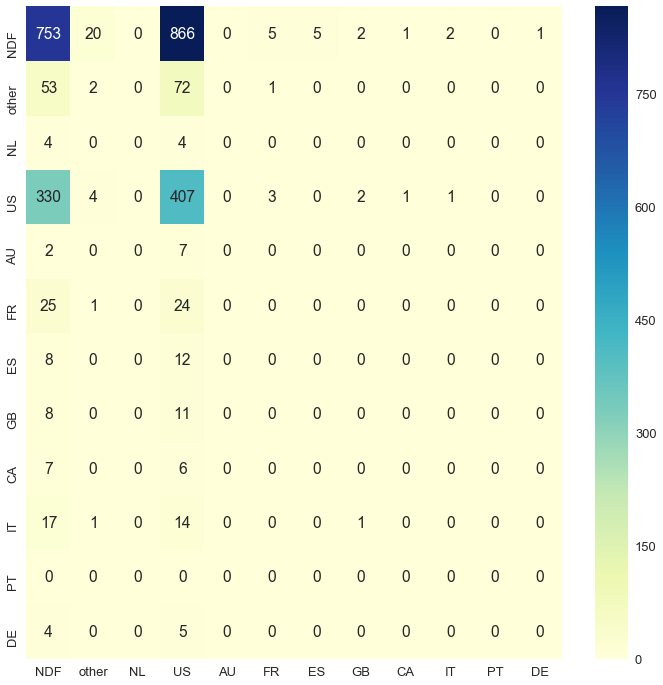

In [18]:
cnf_matrix = confusion_matrix(y_test, y_predict, labels = result_lable)
cnf_matrix = pd.DataFrame(cnf_matrix, index = [i for i in result_lable],
                          columns = [i for i in result_lable])
sn.set(font_scale=1.3)
plt.figure(figsize=(12,12))
sn.heatmap(cnf_matrix, annot= True, cmap="YlGnBu",fmt="d")

plt.show()


## NET WORK
X_os_us_resamp,Y_0s_us_resamp

In [187]:
y = pd.get_dummies(Y_0s_us_resamp, prefix="countary")
print y.head(3)

   countary_AU  countary_CA  countary_DE  countary_ES  countary_FR  \
0            0            0            0            0            0   
1            0            0            0            0            1   
2            0            0            0            0            0   

   countary_GB  countary_IT  countary_NDF  countary_NL  countary_PT  \
0            0            0             1            0            0   
1            0            0             0            0            0   
2            0            0             1            0            0   

   countary_US  countary_other  
0            0               0  
1            0               0  
2            0               0  


In [196]:

model = Sequential()

# 1st Layer - Add an input layer of 132 nodes with the same input shape as
# the training samples in X
model.add(Dense(2333, input_dim = 449 ,W_regularizer = l2(.01)))
model.add(Activation('sigmoid'))
model.add(keras.layers.Dropout(0.50))


model.add(Dense(777,W_regularizer = l2(.01)))
model.add(Activation('sigmoid'))
model.add(keras.layers.Dropout(0.9))

model.add(Dense(259,W_regularizer = l2(.01)))
model.add(Activation('sigmoid'))
model.add(keras.layers.Dropout(0.9))

model.add(Dense(86,W_regularizer = l2(.01)))
model.add(Activation('sigmoid'))
model.add(keras.layers.Dropout(0.9))

model.add(Dense(12, activation = 'softmax'))
model.compile(loss="categorical_crossentropy", optimizer="RMSProp", metrics = ["accuracy"])

/Users/lixiaochi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2333, kernel_regularizer=<keras.reg..., input_dim=449)`
/Users/lixiaochi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(777, kernel_regularizer=<keras.reg...)`
/Users/lixiaochi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(259, kernel_regularizer=<keras.reg...)`
/Users/lixiaochi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(86, kernel_regularizer=<keras.reg...)`


In [197]:
#convert datafram to np-array
x_train=np.array(X_os_us_resamp)


y_new=np.array(y)

In [198]:
x_nw_train, x_nw_test, y_nw_train, y_nw_test = train_test_split(x_train,y_new, test_size=0.02)

In [199]:
model.fit(x_nw_train, y_nw_train,epochs = 150, batch_size=200, verbose=2)

Epoch 1/150
3s - loss: 12.8010 - acc: 0.2639
Epoch 2/150
2s - loss: 5.1069 - acc: 0.3703
Epoch 3/150
2s - loss: 3.5232 - acc: 0.4235
Epoch 4/150
2s - loss: 2.7470 - acc: 0.4551
Epoch 5/150
2s - loss: 2.2714 - acc: 0.4770
Epoch 6/150
2s - loss: 1.9836 - acc: 0.4955
Epoch 7/150
2s - loss: 1.8303 - acc: 0.5136
Epoch 8/150
2s - loss: 1.7298 - acc: 0.5154
Epoch 9/150
2s - loss: 1.6628 - acc: 0.5229
Epoch 10/150
2s - loss: 1.6017 - acc: 0.5230
Epoch 11/150
2s - loss: 1.5824 - acc: 0.5309
Epoch 12/150
2s - loss: 1.5466 - acc: 0.5356
Epoch 13/150
2s - loss: 1.5320 - acc: 0.5364
Epoch 14/150
2s - loss: 1.5031 - acc: 0.5369
Epoch 15/150
3s - loss: 1.5025 - acc: 0.5377
Epoch 16/150
2s - loss: 1.4787 - acc: 0.5380
Epoch 17/150
3s - loss: 1.4930 - acc: 0.5382
Epoch 18/150
2s - loss: 1.4783 - acc: 0.5380
Epoch 19/150
3s - loss: 1.4742 - acc: 0.5380
Epoch 20/150
3s - loss: 1.4722 - acc: 0.5380
Epoch 21/150
3s - loss: 1.4651 - acc: 0.5380
Epoch 22/150
3s - loss: 1.4595 - acc: 0.5380
Epoch 23/150
3s - 

In [200]:

y_nw_predict = model.predict(x_nw_test)


df_prediction = pd.DataFrame(y_nw_predict)
df_y_nw_test = pd.DataFrame(y_nw_test)

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('nn_predict_se_prob.xlsx', engine='xlsxwriter')
# Convert the dataframe to an XlsxWriter Excel object.
df_prediction.to_excel(writer, sheet_name='Sheet1')
# Close the Pandas Excel writer and output the Excel file.
writer.save()

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('nn_real_se_realts.xlsx', engine='xlsxwriter')
# Convert the dataframe to an XlsxWriter Excel object.
df_y_nw_test.to_excel(writer, sheet_name='Sheet1')
# Close the Pandas Excel writer and output the Excel file.
writer.save()